In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
txt_file = open('text.txt', "r")
text = txt_file.read()
text = [c.lower() for c in text]
N = len(text)

print(N)

106128


In [4]:
characters, occurrences = np.unique(text, return_counts=True)
n = len(characters)
print(n)
probs = occurrences/N

39


In [5]:
def entropy(p):
    idx = np.where(p>0)
    h=-np.sum(np.multiply(p[idx],np.log2(p[idx])))
    return h

def entropy_emp(p,n):
    idx = np.where(p>0)
    h=-np.sum(np.multiply(p[idx],np.log2(p[idx])))
    eh=np.sqrt(np.sum(np.multiply(np.square(np.log2(np.e*p)), np.multiply(p,1-p))/n)) 
    return h,eh
    
    
def KLdivergence(p,q):
    idx = np.where(p>0)
    return np.sum(np.nan_to_num(np.multiply(p[idx],np.log2(p[idx]))))-\
            np.sum(np.nan_to_num(np.multiply(p[idx],np.log2(q[idx]))))


def mutual_information(pxy):
    px=np.sum(pxy,axis=0)
    py=np.sum(pxy,axis=1)
    hx=entropy(px)
    hy=entropy(py)
    hxy=entropy(pxy.reshape(-1))
    MI=hx+hy-hxy
    hxcy=hx-MI
    hycx=hy-MI
    return MI,hx,hy



In [6]:
Hall, EHall = entropy_emp(probs,N)
print(Hall,EHall)

4.229585766843208 0.009520398469452756


In [7]:
L=100
auto_mi = np.zeros(L)


for l in range(1,L+1):
    text1=text[:-l]
    text2=text[l:]
    text3=[text1[i]+text2[i] for i in range(N-l)]
    
    character_pairs, occurrences_pairs_nonzero = np.unique(text3, return_counts=True)
    
    occurrences_pairs=np.zeros((n,n))
    
    for i in range(n):
        ci=characters[i]
        for j in range(n):
            cj=characters[j]
            c=ci+cj
            idx = np.where(character_pairs==c)[0]
            if len(idx)>0:
                occurrences_pairs[i,j]=np.squeeze(occurrences_pairs_nonzero[idx])

    occurrences_pairs=occurrences_pairs/(N-l)
    
  
    auto_mi[l-1],hx,hy = mutual_information(occurrences_pairs)


['\n\n' '\n ' '\na' '\nb' '\nc' '\nf' '\ng' '\ni' '\nj' '\nm' '\np' '\ns'
 '\nt' ' \n' '  ' ' &' " '" ' -' ' [' ' a' ' b' ' c' ' d' ' e' ' f' ' g'
 ' h' ' i' ' j' ' k' ' l' ' m' ' n' ' o' ' p' ' q' ' r' ' s' ' t' ' u'
 ' v' ' w' ' y' ' z' '!\n' '! ' "!'" '!-' '& ' "'\n" "' " "'-" "'b" "'c"
 "'d" "'e" "'f" "'g" "'h" "'l" "'m" "'n" "'r" "'s" "'t" "'w" ',\n' ', '
 ",'" ',-' '-\n' '- ' "-'" '--' '-a' '-b' '-c' '-d' '-e' '-f' '-g' '-h'
 '-i' '-k' '-l' '-m' '-n' '-o' '-p' '-r' '-s' '-t' '-v' '-w' '.\n' '. '
 ".'" '.-' ':\n' ': ' ':-' ';\n' '; ' ";'" ';-' '?\n' '? ' '?-' '[a' '[d'
 '[s' '[t' '[w' ']\n' '] ' 'a\n' 'a ' 'a!' 'a,' 'a-' 'a.' 'a:' 'a;' 'a?'
 'a]' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'ai' 'aj' 'ak' 'al' 'am' 'an'
 'ap' 'ar' 'as' 'at' 'au' 'av' 'aw' 'ax' 'ay' 'az' 'b\n' 'b ' "b'" 'b,'
 'ba' 'bb' 'bd' 'be' 'bh' 'bi' 'bj' 'bl' 'bo' 'br' 'bs' 'bt' 'bu' 'by'
 'c\n' 'c ' 'c!' 'c,' 'c.' 'c:' 'ca' 'cc' 'ce' 'ch' 'ci' 'ck' 'cl' 'co'
 'cq' 'cr' 'cs' 'ct' 'cu' 'cy' 'd\n' 'd ' 'd!' "d'" 'd,' 'd-

0.0
0.0
0.0


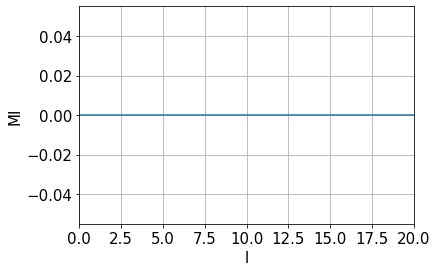

In [8]:
plt.plot(auto_mi)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("l",size=15)
plt.ylabel("MI",size=15)
plt.xlim(0,20)
plt.grid()

print(auto_mi[0])
print(auto_mi[1])
print(auto_mi[2])

In [9]:
text_subsampled = [text[i] for i in range(1,N,10)]

In [10]:
characters_sub, occurrences_sub = np.unique(text_subsampled, return_counts=True)
Nsub = len(text_subsampled)
probs = occurrences_sub/Nsub


Hsub, EHsub = entropy_emp(probs,Nsub)
print(Hall,Hsub,EHall,EHsub)

4.229585766843208 4.22939412884961 0.009520398469452756 0.030112454202498615
